
# multi-dimensional data analysis of anime reviews


**CF401 Python Mid-Term**, Fri Jan 10th, 2020

*Alvian Joseph, Sharmarke Ibrahim, Aaron Imbrock, James Bond*


Slides: <a href="https://github.com/something-cool/french-bread">http://https://github.com/something-cool/french-bread</a>

Notebook: <a href="https://github.com/fmaussion/teaching/blob/master/xarray_intro_acinn/ACINN_workshop_xarray-slides.ipynb"> On GitHub</a>

<img src="./assets/cf-logo.jpg" width="15%" align="left"><img src="./assets/crunchyroll_logo.png" width="35%" align="right">


# Imports

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow, tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import Counter
import nltk
from nltk.corpus import stopwords

import json
from wordcloud import WordCloud

## Return a random dataset

In [2]:
anime_df = pd.read_csv('anime_scraper/more_anime_reviews.csv')
anime_df.sample(10)

,show_title,review,rating,tags
788,dr-stone,The Mystery of the Petrification and the myste...,5.0,"['action', 'sci-fi', 'adventure', 'shonen', 'p..."
4183,hunter-x-hunter,Where can i begin with this anime. Truly outst...,5.0,[]
3774,demon-slayer-kimetsu-no-yaiba,Outstanding introduction to the series in the ...,5.0,"['action', 'supernatural', 'drama']"
1529,food-wars-shokugeki-no-soma,Food wars is as typical as anime can be in thi...,5.0,"['action', 'adventure', 'comedy', 'shonen']"
1563,welcome-to-demon-school-iruma-kun,I saw a clip of the show on YouTube and I was ...,5.0,"['comedy', 'supernatural']"
3036,jojos-bizarre-adventure,My name is Yoshikage Kira. I'm 33 years old. M...,5.0,[]
1345,food-wars-shokugeki-no-soma,"Not just the food they present, but the entire...",5.0,"['action', 'adventure', 'comedy', 'shonen']"
1925,sword-art-online,"Sword Art Online, a very popular light novel f...",5.0,['fantasy']
323,black-clover,If you're the type of person that you dont hav...,2.0,"['fantasy', 'adventure', 'action', 'shonen', '..."
129,my-hero-academia,The half and half kids mom is kinda cute no li...,5.0,"['action', 'fantasy', 'shonen', 'adventure']"


## Show titles in Dataset

In [3]:
shows = anime_df.show_title.unique()
shows

array(['my-hero-academia', 'black-clover', 'dr-stone',
       'boruto-naruto-next-generations', 'food-wars-shokugeki-no-soma',
       'welcome-to-demon-school-iruma-kun', 'fire-force',
       'sword-art-online', 'naruto-shippuden',
       'rezero-starting-life-in-another-world-',
       'jojos-bizarre-adventure',
       'that-time-i-got-reincarnated-as-a-slime',
       'demon-slayer-kimetsu-no-yaiba', 'hunter-x-hunter', 'naruto',
       'dragon-ball-super', 'fullmetal-alchemist-brotherhood'],
      dtype=object)

In [4]:
show_list = ['MHA', 'BC', 'DRS', 'BNG', 'FW', 'DS', 'FF', 'SWO', 'NS', 'RSL', 'JBA', 'S', 'DSK', 'HxH', 'N', 'DBS', 'FMA']

In [5]:

my_hero = anime_df.loc[anime_df['show_title'] == 'my-hero-academia']

black_clover = anime_df.loc[anime_df['show_title'] == 'black-clover']

dr_stone = anime_df.loc[anime_df['show_title'] == 'dr-stone']

boruto_naruto_next_generations = anime_df.loc[anime_df['show_title'] == 'boruto-naruto-next-generations']

food_wars_shokugeki_no_sama = anime_df.loc[anime_df['show_title'] == 'food-wars-shokugeki-no-soma']

welcome_to_demon_school = anime_df.loc[anime_df['show_title'] == 'welcome-to-demon-school-iruma-kun']

fire_force = anime_df.loc[anime_df['show_title'] == 'fire-force']

sword_art_online = anime_df.loc[anime_df['show_title'] == 'sword-art-online']

naruto_shippuden = anime_df.loc[anime_df['show_title'] == 'naruto-shippuden']

rezero_starting_life = anime_df.loc[anime_df['show_title'] == 'rezero-starting-life-in-another-world-']

jojos_bizzare_adventure = anime_df.loc[anime_df['show_title'] == 'jojos-bizarre-adventure']

slime = anime_df.loc[anime_df['show_title'] == 'that-time-i-got-reincarnated-as-a-slime']

demon_slayer = anime_df.loc[anime_df['show_title'] == 'demon-slayer-kimetsu-no-yaiba']

hunter_x_hunter = anime_df.loc[anime_df['show_title'] == 'hunter-x-hunter']

naruto = anime_df.loc[anime_df['show_title'] == 'naruto']

dragon_ball_super = anime_df.loc[anime_df['show_title'] == 'dragon-ball-super']

fullmetal_alchemist = anime_df.loc[anime_df['show_title'] == 'fullmetal-alchemist-brotherhood']

ratings = [my_hero['rating'].mean(), black_clover['rating'].mean(), dr_stone['rating'].mean(), boruto_naruto_next_generations['rating'].mean(), food_wars_shokugeki_no_sama['rating'].mean(), welcome_to_demon_school['rating'].mean(), 
fire_force['rating'].mean(), sword_art_online ['rating'].mean(), naruto_shippuden['rating'].mean(), rezero_starting_life['rating'].mean(), jojos_bizzare_adventure['rating'].mean(), slime['rating'].mean(),
demon_slayer['rating'].mean(), naruto['rating'].mean(), hunter_x_hunter ['rating'].mean(), dragon_ball_super['rating'].mean(), fullmetal_alchemist['rating'].mean()]


ratings

[4.949664429530201,
 3.3925619834710745,
 4.864035087719298,
 2.9677871148459385,
 4.909090909090909,
 4.9375,
 4.5,
 4.69661733615222,
 4.26889848812095,
 4.752771618625277,
 4.991071428571429,
 4.604166666666667,
 4.961904761904762,
 4.892307692307693,
 4.989754098360656,
 4.580128205128205,
 4.991525423728813]

## Make a dictionary of English stop words

In [6]:
stop_words = set(stopwords.words('english'))

## TODO Add comment describing next code

In [7]:
data = anime_df['review'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
all_words = tokenizer.get_config()
all_words = all_words['word_counts']
all_words = json.loads(all_words)
all_words_list = list(all_words.keys())

In [34]:
filtered_words = []
for i in range(len(list(all_words.keys()))):
    if all_words_list[i] not in stop_words:
        filtered_words.append((all_words_list[i], list(all_words.values())[i]))
                              
filtered_words.sort(key=lambda tup: -tup[1])
filtered_words[:10]

[('anime', 7705),
 ('show', 5571),
 ('like', 4202),
 ('characters', 3948),
 ('one', 3559),
 ('story', 3494),
 ('series', 3477),
 ('naruto', 3043),
 ('really', 2876),
 ('character', 2822)]

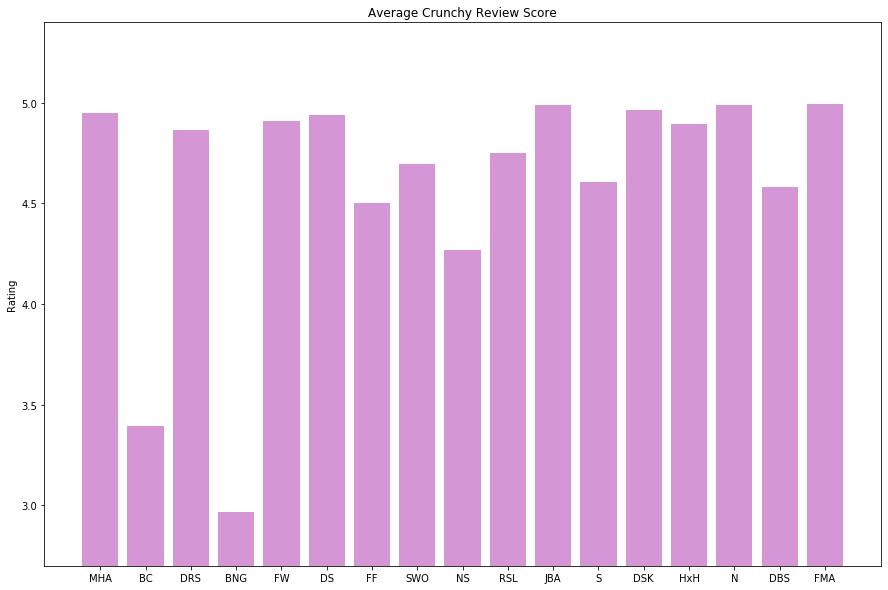

In [24]:
# plt.plot(show_list, ratings, 'ro', markersize=20)
# plt.axis([1, 2, 3, 4, 5])
# plt.show()

objects = show_list
y_pos = np.arange(len(objects))
performance = ratings
plt.figure(figsize=(15,10))
plt.ylim(2.7, 5.4)
plt.bar(y_pos, performance, align='center', alpha=0.5, color='#ab2fad')
plt.xticks(y_pos, objects)
plt.ylabel('Rating')
plt.title('Average Crunchy Review Score')

plt.show()

## Most common words found in review data

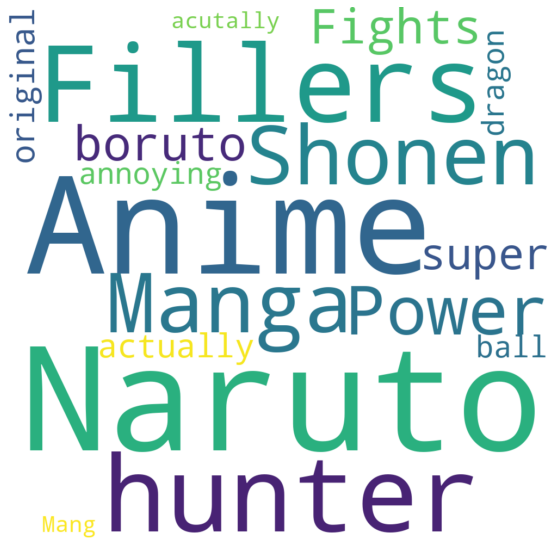

In [9]:
text=("Anime, Anime, Anime, Anime, Anime, Anime, Anime, Mang, Manga, Manga, Manga, Shonen, Shonen, Shonen, Power, Power, Power, Fights, Fights, Fights, Naruto, Naruto, Naruto, Naruto, Naruto, Naruto, Naruto, Naruto, Fillers, Fillers, Fillers, Fillers, boruto, boruto, boruto, actually, actually, acutally, hunter, hunter, hunter, hunter, original, original, annoying, annoying, super, super, super, dragon, dragon, ball, ball,  ")
# Create the wordcloud object
wordcloud = WordCloud(background_color='white', width=1000, height=1000, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [23]:
genre_list = []
def list_to_string(tags):
    global genre_list
    genre_list += (eval(tags))
    return 0

anime_df['tags'].apply(list_to_string)

genre_list[:4]

['action', 'fantasy', 'shonen', 'adventure']

## Most common genres

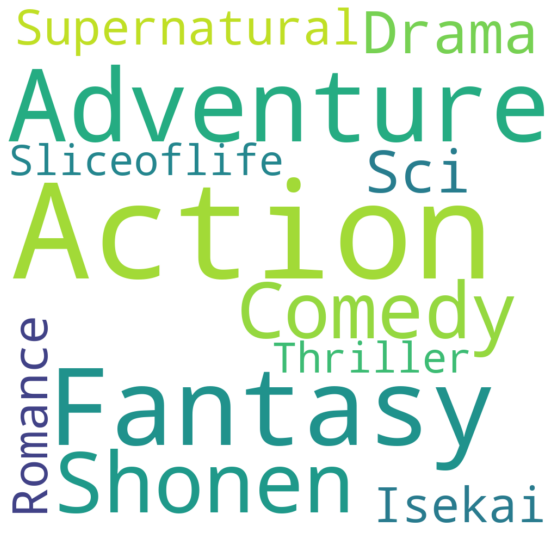

In [13]:
text=("Action Action Action, Action, Action, Fantasy, Fantasy, Fantasy, Shonen, Shonen, Adventure, Adventure, Adventure, Comedy, Comedy, Sci-i, Drama, Supernatural, Romance, Isekai, Sliceoflife, Thriller")
# Create the wordcloud object
wordcloud = WordCloud(background_color='white',width=1000, height=1000, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(20,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
